# Analysing Basic Characteristics of Charters

We look at:

- the length of charter in numbers of words and sentences, 
- the length of sentences in charters. 
- the most frequent words

In [1]:
# for convenience while developing scripts
%reload_ext autoreload
%autoreload 2


## Reading charters from file

In [2]:
import os
import glob
import json



charter_dir = '../data/charters/'

charter_files = glob.glob(os.path.join(charter_dir, '**/*.json'))
len(charter_files)

5955

In [3]:
from scripts.read import CharterReader

charters_orig = CharterReader(charter_files, 'orig', as_sentences=True)
charters_full = CharterReader(charter_files, 'full', as_sentences=True)
charters_lemma = CharterReader(charter_files, 'lemma', as_sentences=True)

for charter in charters_orig:
    print(charter['charter_id'], '\n')
    print(f"\t{' '.join(charter['words'])}\n")
    break

for charter in charters_full:
    print(f"\t{' '.join(charter['words'])}\n")
    break

for charter in charters_lemma:
    print(f"\t{' '.join(charter['words'])}\n")
    break


_o_K094p35502.GADordrecht1.Inv99a.Reg237 

	WJ broeder alaerd van dieden ghardiaen van den minrebroedren in dordr_ en_ broeder ghisebrecht van den berghe lesemeester ter minrebroedren vors_ maken kont en_ kenlic allen luden dat wi ghesien en_ ghehoert hebbe_ jn ons he_en jaer M&r; ccc&r; viue en_ vijftic des donredaghes na sinte jans dach te midde~zomer Een brief ghans en_ ghaue wel bezeghelt Met ons liefs he_en . tsgrauen zeghel van holl_t jn desen worden als hier~na ghescreuen staed &unreadable;

	wj broeder alaerd van dieden ghardiaen van den minrebroedren in dordrecht ende broeder ghisebrecht van den berghe lesemeester ter minrebroedren vorseit maken kont ende kenlic allen luden dat wi ghesien ende ghehoert hebben jn ons heeren jaer m ccc viue ende vijftic des donredaghes na sinte jans dach te middezomer een brief ghans ende ghaue wel bezeghelt met ons liefs heeren . tsgrauen zeghel van hollant jn desen worden als hierna ghescreuen staed &unreadable;

	wij broeder adelhard van died

In [4]:
from collections import defaultdict

doc_length = defaultdict(int)
doc_sents = defaultdict(int)
sent_length = {}
for charter in charters_lemma:
    doc_length[charter['charter_id']] += len(charter['words'])
    doc_sents[charter['charter_id']] += 1
    sent_length[charter['doc_id']] = len(charter['words'])
    
print(f'Number of charters: {len(doc_length)}')
print(f'Number of sentences: {len(sent_length)}')

Number of charters: 5942
Number of sentences: 30093


## Length of Charters

Length in number of word tokens (including punctuation) for both
- charters
- sentences

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

doc_data = {
    'charter_id': [],
    'num_tokens': [],
    'num_sents': []
}

sent_data = {
    'sent_id': [],
    'num_tokens': []
}

for doc_id in doc_length:
    doc_data['charter_id'].append(doc_id)
    doc_data['num_tokens'].append(doc_length[doc_id])
    doc_data['num_sents'].append(doc_sents[doc_id])
    
for sent_id in sent_length:
    sent_data['sent_id'].append(sent_id)
    sent_data['num_tokens'].append(sent_length[sent_id])
    
doc_df = pd.DataFrame(doc_data)
sent_df = pd.DataFrame(sent_data)

pd.concat([
    doc_df.num_tokens.describe().rename('charter_words').to_frame(),
    doc_df.num_sents.describe().rename('charter_sents').to_frame(),
    sent_df.num_tokens.describe().rename('sentence_words').to_frame()
], axis=1).T.style.format(precision=0)



,count,mean,std,min,25%,50%,75%,max
charter_words,5942,356,1243,11,171,242,356,81226
charter_sents,5942,5,5,1,1,4,7,85
sentence_words,30093,70,558,1,18,30,60,81226


For charters, the interquartile range is 171-356, meaning that 50% of charters have between 171 and 356 words, with a median of 242 words. 

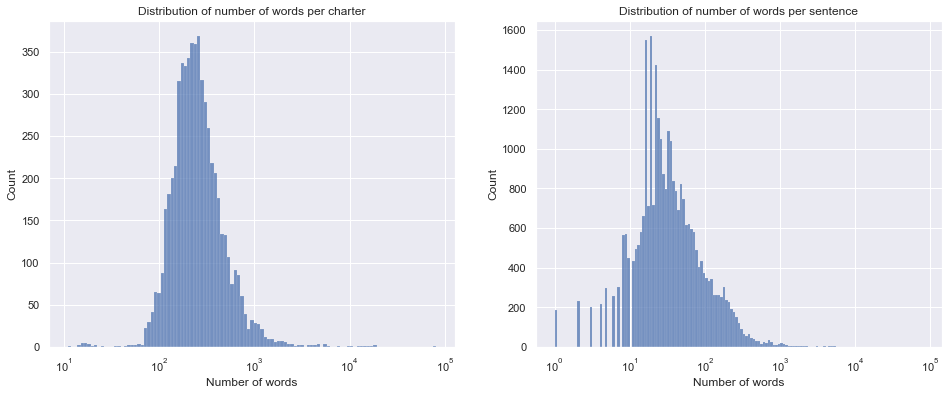

In [6]:
fig, ax = plt.subplots(1, 2)

sns.histplot(data=doc_df, x='num_tokens', log_scale=True, ax=ax[0])
sns.histplot(data=sent_df, x='num_tokens', log_scale=True, ax=ax[1])

ax[0].set_title('Distribution of number of words per charter')
ax[1].set_title('Distribution of number of words per sentence')

ax[0].set_xlabel('Number of words')
ax[1].set_xlabel('Number of words')

fig.set_size_inches(16,6)


There are a small number of very long charters. The longest is over 80,000 tokens.

In [7]:
doc_df[doc_df.num_tokens > 10000]

,charter_id,num_tokens,num_sents
3986,_o_H036p29418,18744,1
4072,_c_H036p28447,18443,1
4195,_c_H036p28446,17274,1
4211,_o_K094p28603,10467,1
4463,_o_I154p30001,10027,1
4632,_o_O098p29102,12042,1
5250,_o_Latij27101_K244,15214,1
5606,_c_H036p28445,13869,1
5762,_c_H036p28444,14619,1
5828,_o_Q168a28501_n:1280-1290,81226,1


## Word Frequencies

In [8]:
from collections import Counter

word_freq = Counter()

for charter in charters_full:
    word_freq.update([word for word in charter['words']])

for word, freq in word_freq.most_common(10):
    print(word, freq)

ende 115972
van 75037
, 66298
. 50023
die 40397
~ 37050
dat 35876
den 32912
te 31552
in 22040


In [9]:
for word, freq in word_freq.most_common(100):
    if len(word) < 6:
        continue
    print(word, freq)

hebben 9310
vorseide 7385
vorseit 6031
scepenen 4401
willem 3700
ghedaen 3567
gheleghen 3079
lettren 3012
vanden 2968
vorseiden 2831
voerseit 2732
sullen 2615


## Grouping full word representations by their lemma

One problem with counting words and phrases is that the charters contain a lot of spelling variation. One way to address this, is to group word forms by lemma and choosing a preferred spelling. 

In [16]:
charters_full_lemma = CharterReader(charter_files, ('full', 'lemma'), as_sentences=True)


In [25]:
from collections import Counter
from collections import defaultdict

word_lemma_freq = defaultdict(Counter)

for charter in charters_full_lemma:
    for word, lemma in charter['words']:
        word_lemma_freq[word].update([lemma])
    


In [35]:
print(f"{'word': <20}{'freq': >8}\t{'lemma': <20}{'freq': >8}")
print('------------------------------------------------------------')
for word, freq in word_freq.most_common(100): 
    for lemma in word_lemma_freq[word]:
        print(f"{word: <20}{freq: >8}\t{lemma: <20}{word_lemma_freq[word][lemma]: >8}")
    print('\n')

word                    freq	lemma                   freq
------------------------------------------------------------
ende                  115972	en                    115809
ende                  115972	eind                     127
ende                  115972	lemma                      6
ende                  115972	ende                       3
ende                  115972	en+de                      6
ende                  115972	einde                      1
ende                  115972	ne                         1
ende                  115972	in+de                      9
ende                  115972	in                        10


van                    75037	van                    75034
van                    75037	er+van                     1
van                    75037	op                         1
van                    75037	winnen                     1


,                      66298	,                      66298


.                      50023	.                      50023


die